# Exploratory Data Analysis

The dataset used in this here was taken from the UCI Machine Learning Repository, you can check it [here](https://archive.ics.uci.edu/ml/datasets/Internet+Firewall+Data). The data was obtained from the firewall device used at Firat University and then classified into 4 classes: allow, deny, drop and reset-both. The purpose of the original [paper](https://ieeexplore.ieee.org/document/8355382) was to obtain the best activation function for F1 score value.

This dataset consists of 65532 samples and 11 features, here is a brief description of all of them:

- **Source Port**: Client Source Port
- **Destination Port**: Client Destination Port
- **NAT Source Port**: Network Address Translation Source Port
- **NAT Destination Port**: Network Address Translation Destination Port
- **Elapsed Time (sec)**: Elapsed Time for flow
- **Bytes**: Total Bytes
- **Bytes Sent**: Bytes Sent
- **Bytes Received**: Bytes Received
- **Packets**: Total Packets
- **pkts_sent**: Packets Sent
- **pkts_received**: Packets Received
- **Action**: Class to predict (allow, deny, drop, reset-both)

I will first perform an EDA over the dataset, check distribution of the features and how they are related to the class variable.

Let's get started by first importing the libraries that will be used.

In [1]:
import numpy as np
import pandas as pd

Now take a quick look to the data will be using

In [2]:
df = pd.read_csv('./log2.csv')
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


Let's check some general statistics about the numerical features of the dataset

In [4]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [3]:
df['Action'].value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [93]:
X = df.drop(columns=['Action']).to_numpy()
y = df['Action'].to_numpy()

In [94]:
X

array([[57222,    53, 54587, ...,    30,     1,     1],
       [56258,  3389, 56258, ...,    17,    10,     9],
       [ 6881, 50321, 43265, ...,  1199,     1,     1],
       ...,
       [54871,   445,     0, ...,     0,     1,     0],
       [54870,   445,     0, ...,     0,     1,     0],
       [54867,   445,     0, ...,     0,     1,     0]], dtype=int64)

In [95]:
y

array(['allow', 'allow', 'allow', ..., 'drop', 'drop', 'drop'],
      dtype=object)

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [97]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((52425, 11), (13107, 11), (52425,), (13107,))

In [98]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=50)

In [99]:
model = model.fit(X_train, y_train)

c:\Users\Usuario\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [100]:
from sklearn.metrics import classification_report


y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

c:\Users\Usuario\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       0.99      0.99      0.99      7514
        deny       0.93      0.99      0.96      2814
        drop       1.00      0.92      0.96      2779
  reset-both       0.00      0.00      0.00         0

    accuracy                           0.98     13107
   macro avg       0.73      0.73      0.73     13107
weighted avg       0.98      0.98      0.98     13107



c:\Users\Usuario\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Neural Network

In [180]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, InputLayer

model = Sequential()
model.add(InputLayer(input_shape=(11,)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

In [181]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [182]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 128)               1536      
                                                                 
 dense_111 (Dense)           (None, 64)                8256      
                                                                 
 dense_112 (Dense)           (None, 4)                 260       
                                                                 
Total params: 10,052
Trainable params: 10,052
Non-trainable params: 0
_________________________________________________________________


In [183]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64)

Epoch 1/20


ValueError: in user code:

    File "c:\Users\Usuario\miniconda3\envs\myenv\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Usuario\miniconda3\envs\myenv\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Usuario\miniconda3\envs\myenv\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Usuario\miniconda3\envs\myenv\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Usuario\miniconda3\envs\myenv\lib\site-packages\keras\engine\training.py", line 949, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses)
    File "c:\Users\Usuario\miniconda3\envs\myenv\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Usuario\miniconda3\envs\myenv\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\Usuario\miniconda3\envs\myenv\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Usuario\miniconda3\envs\myenv\lib\site-packages\keras\losses.py", line 1788, in categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    File "c:\Users\Usuario\miniconda3\envs\myenv\lib\site-packages\keras\backend.py", line 5110, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 4) are incompatible


In [185]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
le.classes_

array(['allow', 'deny', 'drop', 'reset-both'], dtype=object)

In [189]:
y_train_new = le.transform(y_train)

In [216]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, InputLayer

model_2 = Sequential()
model_2.add(InputLayer(input_shape=(11,)))
model_2.add(Dense(units=128, activation='relu'))
model_2.add(Dense(units=64, activation='relu'))
model_2.add(Dense(units=4, activation='softmax'))

In [217]:
model_2.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [218]:
model_2.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_134 (Dense)           (None, 128)               1536      
                                                                 
 dense_135 (Dense)           (None, 64)                8256      
                                                                 
 dense_136 (Dense)           (None, 4)                 260       
                                                                 
Total params: 10,052
Trainable params: 10,052
Non-trainable params: 0
_________________________________________________________________


In [219]:
history = model_2.fit(X_train, y_train_new, epochs=15, batch_size=64)

Epoch 1/15
820/820 [==============================] - 1s 841us/step - loss: 261.4996 - accuracy: 0.9424
Epoch 2/15
820/820 [==============================] - 1s 811us/step - loss: 14.2838 - accuracy: 0.9611
Epoch 3/15
820/820 [==============================] - 1s 800us/step - loss: 13.4910 - accuracy: 0.9627
Epoch 4/15
820/820 [==============================] - 1s 789us/step - loss: 11.7816 - accuracy: 0.9640
Epoch 5/15
820/820 [==============================] - 1s 790us/step - loss: 10.2069 - accuracy: 0.9670
Epoch 6/15
820/820 [==============================] - 1s 822us/step - loss: 7.3150 - accuracy: 0.9689
Epoch 7/15
820/820 [==============================] - 1s 816us/step - loss: 7.6970 - accuracy: 0.9689
Epoch 8/15
820/820 [==============================] - 1s 823us/step - loss: 4.2474 - accuracy: 0.9719
Epoch 9/15
820/820 [==============================] - 1s 823us/step - loss: 3.3498 - accuracy: 0.9715
Epoch 10/15
820/820 [==============================] - 1s 799us/step - loss:

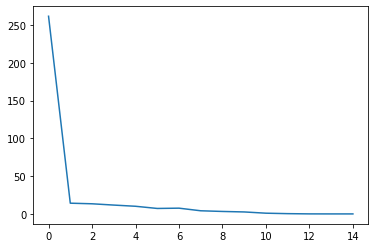

In [220]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

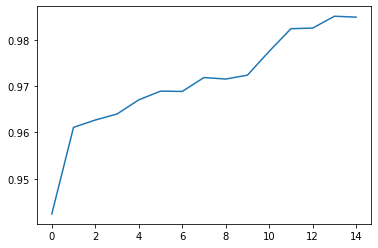

In [221]:
plt.plot(history.history['accuracy'])

In [222]:
y_test_new = le.transform(y_test)
model_2.evaluate(X_test,y_test_new)

410/410 [==============================] - 0s 636us/step - loss: 0.0751 - accuracy: 0.9832


[0.07510293275117874, 0.9832150936126709]